In [1]:
#Install all necessary packages/libaries/etc. 

!pip install pandas 
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [2]:
#Load the dataset
import pandas as pd

df = pd.read_csv('Downloads/COVIDiSTRESS_May_30_cleaned_final.csv', encoding='ISO-8859-1', low_memory=False)

print(df.info())
print(df.head())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125306 entries, 0 to 125305
Columns: 154 entries, ID to Scale_UCLA_TRI_avg
dtypes: float64(125), int64(3), object(26)
memory usage: 147.2+ MB
None
   ID answered_all  Duration..in.seconds.         RecordedDate UserLanguage  \
0   1           No                    180  2020-05-30 23:47:17          SAR   
1   2           No                   3100  2020-05-29 23:30:15           UR   
2   3           No                    127  2020-05-30 22:40:15          SAR   
3   4           No                   1710  2020-05-29 22:47:17           BG   
4   5           No                   2239  2020-05-29 22:42:30          SAR   

   Dem_age Dem_gender                                            Dem_edu  \
0       29     Female                   College degree, bachelor, master   
1       20       Male                   College degree, bachelor, master   
2       47     Female  Some College, short continuing education or eq...   
3       79       Male   

In [3]:
#Find unique values per column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

ID: 125306 unique values
answered_all: 2 unique values
Duration..in.seconds.: 9294 unique values
RecordedDate: 118604 unique values
UserLanguage: 47 unique values
Dem_age: 86 unique values
Dem_gender: 3 unique values
Dem_edu: 7 unique values
Dem_edu_mom: 7 unique values
Dem_employment: 6 unique values
Country: 177 unique values
Dem_Expat: 2 unique values
Dem_state: 11476 unique values
Dem_maritalstatus: 5 unique values
Dem_dependents: 43 unique values
Dem_riskgroup: 3 unique values
Dem_isolation: 5 unique values
Dem_isolation_adults: 58 unique values
Dem_isolation_kids: 35 unique values
AD_gain: 2 unique values
AD_loss: 2 unique values
AD_check: 3 unique values
Scale_PSS10_UCLA_1: 5 unique values
Scale_PSS10_UCLA_2: 5 unique values
Scale_PSS10_UCLA_3: 5 unique values
Scale_PSS10_UCLA_4: 5 unique values
Scale_PSS10_UCLA_5: 5 unique values
Scale_PSS10_UCLA_6: 5 unique values
Scale_PSS10_UCLA_7: 5 unique values
Scale_PSS10_UCLA_8: 5 unique values
Scale_PSS10_UCLA_9: 5 unique values
Scale_

By looking at dataset, we can see our target variable and the variable that identifies the gender of the participant. 

The target variable is PSS10_avg. 
The gender variable is Dem_gender. 

We can also identify that we will need to get rid of some columns that have also been averaged. The columns with the averages will be used to train the models, and including the other columns can interfere with the models. 

These columns are: 
    'Scale_PSS10_UCLA_1', 'Scale_PSS10_UCLA_2', 'Scale_PSS10_UCLA_3', 'Scale_PSS10_UCLA_4',
    'Scale_PSS10_UCLA_5', 'Scale_PSS10_UCLA_6', 'Scale_PSS10_UCLA_7', 'Scale_PSS10_UCLA_8',
    'Scale_PSS10_UCLA_9', 'Scale_PSS10_UCLA_10',
    'Scale_SLON_1', 'Scale_SLON_2', 'Scale_SLON_3',
    'BFF_15_1', 'BFF_15_2', 'BFF_15_3', 'BFF_15_4', 'BFF_15_5',
    'BFF_15_6', 'BFF_15_7', 'BFF_15_8', 'BFF_15_9', 'BFF_15_10',
    'BFF_15_11', 'BFF_15_12', 'BFF_15_13', 'BFF_15_14', 'BFF_15_15',
    'SPS_1', 'SPS_2', 'SPS_3', 'SPS_4', 'SPS_5',
    'SPS_6', 'SPS_7', 'SPS_8', 'SPS_9', 'SPS_10'

In [4]:
#Assess structure
df_info = df.info()

#Summary of missing values per column (only showing those with any missing data)
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125306 entries, 0 to 125305
Columns: 154 entries, ID to Scale_UCLA_TRI_avg
dtypes: float64(125), int64(3), object(26)
memory usage: 147.2+ MB


time_spent_in_war_TXT    125304
experience_war_TXT       125303
PS_PTSD_5                125257
PS_PTSD_3                125257
Scale_UCLA_TRI_4         125256
                          ...  
Dem_maritalstatus          1015
Dem_Expat                   712
Dem_riskgroup               619
Country                     545
Dem_gender                  306
Length: 148, dtype: int64

It appears as if we have a lot of missing values within our dataset, which is not ideal. These will be dealt with now.

In [5]:
#Cleaning missing data (Dataset has been somewhat cleaned already due to COVIDiSTRESS's preprocessing of the dataset)

#Drop columns with more than 20% missing values
threshold = 0.20  # 20% threshold
missing_ratio = df.isnull().mean()
columns_to_drop = missing_ratio[missing_ratio > threshold].index
df_reduced = df.drop(columns=columns_to_drop)

#Drop rows with any remaining missing values
df_cleaned = df_reduced.dropna()

#Results
cleaned_shape = df_cleaned.shape
dropped_columns = list(columns_to_drop)
remaining_columns = list(df_cleaned.columns)

(cleaned_shape, dropped_columns, remaining_columns)

((58969, 75),
 ['AD_gain',
  'AD_loss',
  'born_92',
  'experience_war',
  'experience_war_TXT',
  'war_injury',
  'loss_during_war',
  'time_spent_in_war',
  'time_spent_in_war_TXT',
  'Scale_UCLA_TRI_1',
  'Scale_UCLA_TRI_2',
  'Scale_UCLA_TRI_3',
  'Scale_UCLA_TRI_4',
  'PS_PTSD_1',
  'PS_PTSD_2',
  'PS_PTSD_3',
  'PS_PTSD_4',
  'PS_PTSD_5',
  'Expl_Distress_1',
  'Expl_Distress_2',
  'Expl_Distress_3',
  'Expl_Distress_4',
  'Expl_Distress_5',
  'Expl_Distress_6',
  'Expl_Distress_7',
  'Expl_Distress_8',
  'Expl_Distress_9',
  'Expl_Distress_10',
  'Expl_Distress_11',
  'Expl_Distress_12',
  'Expl_Distress_13',
  'Expl_Distress_14',
  'Expl_Distress_15',
  'Expl_Distress_16',
  'Expl_Distress_17',
  'Expl_Distress_18',
  'Expl_Distress_19',
  'Expl_Distress_20',
  'Expl_Distress_21',
  'Expl_Distress_22',
  'Expl_Distress_23',
  'Expl_Distress_24',
  'Expl_Distress_txt',
  'SPS_1',
  'SPS_2',
  'SPS_3',
  'SPS_4',
  'SPS_5',
  'SPS_6',
  'SPS_7',
  'SPS_8',
  'SPS_9',
  'SPS_10',


In [6]:
#Drop the columns related to PSS10 and Loneliness as we have averages for these variables. 

additional_columns_to_drop = [
    #PSS10 individual items
    'Scale_PSS10_UCLA_1', 'Scale_PSS10_UCLA_2', 'Scale_PSS10_UCLA_3', 'Scale_PSS10_UCLA_4',
    'Scale_PSS10_UCLA_5', 'Scale_PSS10_UCLA_6', 'Scale_PSS10_UCLA_7', 'Scale_PSS10_UCLA_8',
    'Scale_PSS10_UCLA_9', 'Scale_PSS10_UCLA_10',

    #Loneliness scale items
    'Scale_SLON_1', 'Scale_SLON_2', 'Scale_SLON_3',

    #BFF scale items
    'BFF_15_1', 'BFF_15_2', 'BFF_15_3', 'BFF_15_4', 'BFF_15_5',
    'BFF_15_6', 'BFF_15_7', 'BFF_15_8', 'BFF_15_9', 'BFF_15_10',
    'BFF_15_11', 'BFF_15_12', 'BFF_15_13', 'BFF_15_14', 'BFF_15_15',

    #SPS scale items
    'SPS_1', 'SPS_2', 'SPS_3', 'SPS_4', 'SPS_5',
    'SPS_6', 'SPS_7', 'SPS_8', 'SPS_9', 'SPS_10',

    #Metadata columns to drop
    'ID', 'answered_all', 'Duration..in.seconds.', 'RecordedDate', 'Dem_state', 'UserLanguage', 'Country'
]

final_df = df_cleaned.drop(columns=[col for col in additional_columns_to_drop if col in df_cleaned.columns])

remaining_columns = list(final_df.columns)

remaining_columns

['Dem_age',
 'Dem_gender',
 'Dem_edu',
 'Dem_edu_mom',
 'Dem_employment',
 'Dem_Expat',
 'Dem_maritalstatus',
 'Dem_dependents',
 'Dem_riskgroup',
 'Dem_isolation',
 'Dem_isolation_adults',
 'Dem_isolation_kids',
 'AD_check',
 'OECD_people_1',
 'OECD_people_2',
 'OECD_insititutions_1',
 'OECD_insititutions_2',
 'OECD_insititutions_3',
 'OECD_insititutions_4',
 'OECD_insititutions_5',
 'OECD_insititutions_6',
 'Corona_concerns_1',
 'Corona_concerns_2',
 'Corona_concerns_3',
 'Corona_concerns_4',
 'Corona_concerns_5',
 'Trust_countrymeasure',
 'Compliance_1',
 'Compliance_2',
 'Compliance_3',
 'Compliance_4',
 'Compliance_5',
 'Compliance_6',
 'PSS10_avg',
 'SLON3_avg',
 'neu',
 'ext',
 'ope',
 'agr',
 'con']

In [7]:
print("Final shape:", final_df.shape)
final_df.head()

Final shape: (58969, 40)


,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Dem_Expat,Dem_maritalstatus,Dem_dependents,Dem_riskgroup,Dem_isolation,...,Compliance_4,Compliance_5,Compliance_6,PSS10_avg,SLON3_avg,neu,ext,ope,agr,con
5,68,Male,"College degree, bachelor, master",College degree,Retired,no,Married/cohabiting,0.0,No,Life carries on with minor changes,...,4.0,4.0,1.0,2.1,2.333333,3.333333,3.666667,4.333333,4.000000,3.666667
6,29,Other/would rather not say,"Some College, short continuing education or eq...",Some College or equivalent,Part time employed,no,Other or would rather not say,1.0,Yes,Isolated,...,3.0,5.0,2.0,2.3,2.666667,3.666667,3.666667,5.000000,4.666667,4.666667
7,38,Female,Up to 12 years of school,Up to 12 years of school,Not employed,no,Married/cohabiting,1.0,Yes,Life carries on with minor changes,...,2.0,3.0,5.0,2.6,2.666667,3.666667,3.333333,4.333333,4.000000,4.333333
11,31,Female,"College degree, bachelor, master",College degree,Full time employed,no,Single,0.0,No,Isolated,...,3.0,5.0,4.0,2.7,2.666667,3.000000,3.666667,5.000000,4.666667,6.000000
13,49,Female,"Some College, short continuing education or eq...",Up to 12 years of school,Part time employed,no,Single,2.0,No,Life carries on with minor changes,...,4.0,5.0,5.0,1.9,1.666667,2.333333,4.333333,5.000000,5.333333,6.000000


In [8]:
# Check object-type (categorical) columns only
print(final_df.select_dtypes(include=['object']).nunique())

Dem_gender           3
Dem_edu              7
Dem_edu_mom          7
Dem_employment       6
Dem_Expat            2
Dem_maritalstatus    5
Dem_riskgroup        3
Dem_isolation        5
AD_check             3
dtype: int64


In [9]:
print(final_df['Dem_gender'].unique())
print(final_df['Dem_edu'].unique())
print(final_df['Dem_edu_mom'].unique())
print(final_df['Dem_employment'].unique())
print(final_df['Dem_Expat'].unique())
print(final_df['Dem_maritalstatus'].unique())
print(final_df['Dem_riskgroup'].unique())
print(final_df['Dem_isolation'].unique())
print(final_df['AD_check'].unique())

['Male' 'Other/would rather not say' 'Female']
['College degree, bachelor, master'
 'Some College, short continuing education or equivalent'
 'Up to 12 years of school' 'PhD/Doctorate' 'Up to 9 years of school'
 'Up to 6 years of school' 'Uninformative response']
['College degree' 'Some College or equivalent' 'Up to 12 years of school'
 'Up to 6 years of school' 'Up to 9 years of school' 'PhD/Doctorate'
 'Uninformative response']
['Retired' 'Part time employed' 'Not employed' 'Full time employed'
 'Self-employed' 'Student']
['no' 'yes']
['Married/cohabiting' 'Other or would rather not say' 'Single'
 'Divorced/widowed' 'Uninformative response']
['No' 'Yes' 'Not sure']
['Life carries on with minor changes' 'Isolated'
 'Life carries on as usual'
 'Isolated in medical facility of similar location' '1']
['No' 'Not sure' 'Yes']


In [10]:
#Dem_isolation showing a value of '1' is strange. We may need to drop those rows if there aren't many. 
#We may also want to drop all the rows that contain "Uninformative response" as a value, if there aren't many.
print(final_df['Dem_isolation'].value_counts())
print(final_df['Dem_edu'].value_counts())
print(final_df['Dem_edu_mom'].value_counts())
print(final_df['Dem_maritalstatus'].value_counts())

Dem_isolation
Life carries on with minor changes                  29704
Isolated                                            26588
Life carries on as usual                             2608
Isolated in medical facility of similar location       62
1                                                       7
Name: count, dtype: int64
Dem_edu
College degree, bachelor, master                          32383
Some College, short continuing education or equivalent    13742
Up to 12 years of school                                   5864
PhD/Doctorate                                              5592
Up to 9 years of school                                     742
Up to 6 years of school                                     638
Uninformative response                                        8
Name: count, dtype: int64
Dem_edu_mom
College degree                18401
Up to 12 years of school      14800
Some College or equivalent    11247
Up to 9 years of school        7703
Up to 6 years of school        4

In [11]:
#Dropping the rows with '1' and 'Uninformative response' given that there aren't that many of those values.
final_df = final_df[final_df['Dem_isolation'] != '1']

columns_with_uninformative = ['Dem_edu', 'Dem_edu_mom', 'Dem_maritalstatus']
final_df = final_df[~final_df[columns_with_uninformative].isin(['Uninformative response']).any(axis=1)]

In [12]:
print(final_df.shape)

(58919, 40)


In [13]:
#Creating encoding maps
#Gender encoding
gender_map = {
    'Female': 0,
    'Male': 1,
    'Other/would rather not say': 2
}

#Education level (self)
edu_map = {
    'Up to 6 years of school': 0,
    'Up to 9 years of school': 1,
    'Up to 12 years of school': 2,
    'Some College, short continuing education or equivalent': 3,
    'College degree, bachelor, master': 4,
    'PhD/Doctorate': 5,
    'Uninformative response': -1  # Optional: You could drop or encode as unknown
}

#Education level (mother)
edu_mom_map = {
    'Up to 6 years of school': 0,
    'Up to 9 years of school': 1,
    'Up to 12 years of school': 2,
    'Some College or equivalent': 3,
    'College degree': 4,
    'PhD/Doctorate': 5,
    'Uninformative response': -1
}

#Employment
employment_map = {
    'Student': 0,
    'Not employed': 1,
    'Part time employed': 2,
    'Full time employed': 3,
    'Self-employed': 4,
    'Retired': 5
}

#Expat status
expat_map = {
    'no': 0,
    'yes': 1
}

#Marital status
marital_map = {
    'Single': 0,
    'Married/cohabiting': 1,
    'Divorced/widowed': 2,
    'Other or would rather not say': 3,
    'Uninformative response': -1
}

#Risk group
riskgroup_map = {
    'No': 0,
    'Yes': 1,
    'Not sure': 2
}

#Isolation status
isolation_map = {
    'Life carries on as usual': 0,
    'Life carries on with minor changes': 1,
    'Isolated': 2,
    'Isolated in medical facility of similar location': 3,
    '1': 4  # Optional: unclear meaning, consider dropping or verifying
}

#AD_check
ad_check_map = {
    'No': 0,
    'Yes': 1,
    'Not sure': 2
}

In [14]:
final_df['Dem_gender'] = final_df['Dem_gender'].map(gender_map)
final_df['Dem_edu'] = final_df['Dem_edu'].map(edu_map)
final_df['Dem_edu_mom'] = final_df['Dem_edu_mom'].map(edu_mom_map)
final_df['Dem_employment'] = final_df['Dem_employment'].map(employment_map)
final_df['Dem_Expat'] = final_df['Dem_Expat'].map(expat_map)
final_df['Dem_maritalstatus'] = final_df['Dem_maritalstatus'].map(marital_map)
final_df['Dem_riskgroup'] = final_df['Dem_riskgroup'].map(riskgroup_map)
final_df['Dem_isolation'] = final_df['Dem_isolation'].map(isolation_map)
final_df['AD_check'] = final_df['AD_check'].map(ad_check_map)

In [15]:
#Checking for any missing values left
print(final_df.isnull().sum().sort_values(ascending=False).head(10))

Dem_age              0
Dem_gender           0
Dem_edu              0
Dem_edu_mom          0
Dem_employment       0
Dem_Expat            0
Dem_maritalstatus    0
Dem_dependents       0
Dem_riskgroup        0
Dem_isolation        0
dtype: int64


In [16]:
#Now we start manipulating the dataset to work with our goals. 
#We first keep only the 'male' and 'female' values in the gender category.  
filtered_df = final_df[final_df['Dem_gender'].isin([0, 1])]

#Then we split the dataset by gender. 

df_female = filtered_df[filtered_df['Dem_gender'] == 0]
df_male = filtered_df[filtered_df['Dem_gender'] == 1]

print(df_female.shape)
print(df_male.shape)

(41813, 40)
(16470, 40)


In [17]:
#To avoid gender imabalance in the general model, we need to downsample the larger group.
min_len = min(len(df_female), len(df_male))
df_female_balanced = df_female.sample(n=min_len, random_state=42)
df_male_balanced = df_male.sample(n=min_len, random_state=42)

#Concatenate the datasets into a balanced dataset
df_general = pd.concat([df_female_balanced, df_male_balanced], axis=0)

#Ensure the datasets have the same number of rows
df_female = df_female_balanced.copy()
df_male = df_male_balanced.copy()

#Shuffle the datasets, and also ensure the general dataset is the same size as the rest.
df_general = df_general.sample(n=min_len, random_state=42).reset_index(drop=True)
df_female = df_female.sample(frac=1, random_state=42).reset_index(drop=True)
df_male = df_male.sample(frac=1, random_state=42).reset_index(drop=True)


#To confirm they're all the same size
print(df_general.shape)
print(df_female.shape)
print(df_male.shape)

(16470, 40)
(16470, 40)
(16470, 40)


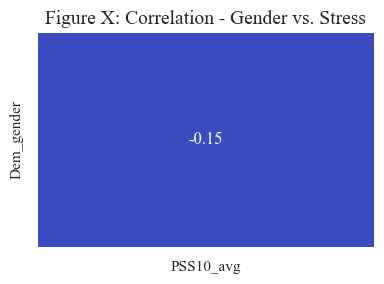

In [18]:
#Plotting the correlation between gender and PSS10_avg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation DataFrame
corr_matrix = df_general[['Dem_gender', 'PSS10_avg']].corr()

# Plot focused heatmap
plt.figure(figsize=(4, 3))
sns.set_theme(style="whitegrid", font="Times New Roman")
sns.heatmap(corr_matrix.loc[['Dem_gender'], ['PSS10_avg']], 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=False)

plt.title("Figure X: Correlation - Gender vs. Stress", fontsize=14)
plt.tight_layout()
plt.show()

Shows a very very weak correlation between Gender and Stress. Lower than expected, but still shows a small relationship. 

In [19]:
#Splitting the data!

from sklearn.model_selection import train_test_split

target_col = 'PSS10_avg'

#For all datasets, drop PSS10_avg and gender when making feature matrix X
drop_cols = [target_col, 'Dem_gender']


#GENERAL MODEL
X_general = df_general.drop(columns=drop_cols)
y_general = df_general[target_col]

X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_general, y_general, test_size=0.2, random_state=42)


#FEMALE-SPECIFIC MODEL
X_female = df_female.drop(columns=drop_cols)
y_female = df_female[target_col]

X_fem_train, X_fem_test, y_fem_train, y_fem_test = train_test_split(X_female, y_female, test_size=0.2, random_state=42)


#MALE-SPECIFIC MODEL
X_male = df_male.drop(columns=drop_cols)
y_male = df_male[target_col]

X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

In [20]:
#Removing Low-Variance features
from sklearn.feature_selection import VarianceThreshold

#GENERAL MODEL
selector = VarianceThreshold(threshold=0.01)
X_gen_train = selector.fit_transform(X_gen_train)
X_gen_test = selector.transform(X_gen_test)

#FEMALE-SPECIFIC MODEL
selector = VarianceThreshold(threshold=0.01)
X_fem_train = selector.fit_transform(X_fem_train)
X_fem_test = selector.transform(X_fem_test)

#MALE-SPECIFIC MODEL
selector = VarianceThreshold(threshold=0.01)
X_male_train = selector.fit_transform(X_male_train)
X_male_test = selector.transform(X_male_test)

In [21]:
#Training the models using Grid Search to find the best hyperparameters automatically
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#Define the parameter grid (This has been tuned through applying and evaluating various parameters)
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4, 10],
    'max_features': ['sqrt', 0.8, None]
}

#Base model
base_rf = RandomForestRegressor(random_state=42)


#General Model
grid_gen = GridSearchCV(
    estimator=base_rf,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)
grid_gen.fit(X_gen_train, y_gen_train)
rf_general = grid_gen.best_estimator_
print("Best General Model Selected.")


#Female Model
grid_fem = GridSearchCV(
    estimator=base_rf,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)
grid_fem.fit(X_fem_train, y_fem_train)
rf_female = grid_fem.best_estimator_
print("Best Female Model Selected.")


# Grid Search for Male Model
grid_male = GridSearchCV(
    estimator=base_rf,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)
grid_male.fit(X_male_train, y_male_train)
rf_male = grid_male.best_estimator_
print("Best Male Model Selected.")

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best General Model Selected.
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Female Model Selected.
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Male Model Selected.


In [22]:
#View best hyperparameters 
print("Best parameters (General):", grid_gen.best_params_)
print("Best parameters (Female):", grid_fem.best_params_)
print("Best parameters (Male):", grid_male.best_params_)

Best parameters (General): {'max_depth': None, 'max_features': 0.8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Best parameters (Female): {'max_depth': 20, 'max_features': 0.8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Best parameters (Male): {'max_depth': 20, 'max_features': 0.8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}


In [23]:
#Evaluate the models 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test, model_name="Model"):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    print(f"{model_name} Evaluation:")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")
    print("-" * 30)

evaluate_model(rf_general, X_gen_test, y_gen_test, model_name="General Model")
evaluate_model(rf_female, X_fem_test, y_fem_test, model_name="Female Model")
evaluate_model(rf_male, X_male_test, y_male_test, model_name="Male Model")

General Model Evaluation:
MAE:  0.4012
RMSE: 0.5087
R²:   0.5272
------------------------------
Female Model Evaluation:
MAE:  0.4208
RMSE: 0.5299
R²:   0.4882
------------------------------
Male Model Evaluation:
MAE:  0.3867
RMSE: 0.4910
R²:   0.5309
------------------------------


In [24]:
#Plotting feature importance

import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(model, X, title, top_n=15, figsize=(10, 6)):
    #Preparing data for plotting
    importances = model.feature_importances_
    features = pd.Series(importances, index=X.columns)
    top_features = features.sort_values(ascending=False).head(top_n).reset_index()
    top_features.columns = ['Feature', 'Importance']

    #Setting fonts and layout
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman'],
        'axes.titlesize': 16,
        'axes.labelsize': 13,
        'xtick.labelsize': 11,
        'ytick.labelsize': 11
    })
    sns.set(style="whitegrid")

    #Plotting barplot
    plt.figure(figsize=figsize)
    ax = sns.barplot(
        data=top_features,
        x='Importance',
        y='Feature',
        hue='Feature',
        palette="crest",
        dodge=False,
        legend=False
    )

    #Annotate each bar with value
    for i, row in top_features.iterrows():
        ax.text(row['Importance'] + 0.001, i, f"{row['Importance']:.3f}",
                color='black', va='center', fontfamily='Times New Roman', fontsize=11)

    plt.title(title, pad=15)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

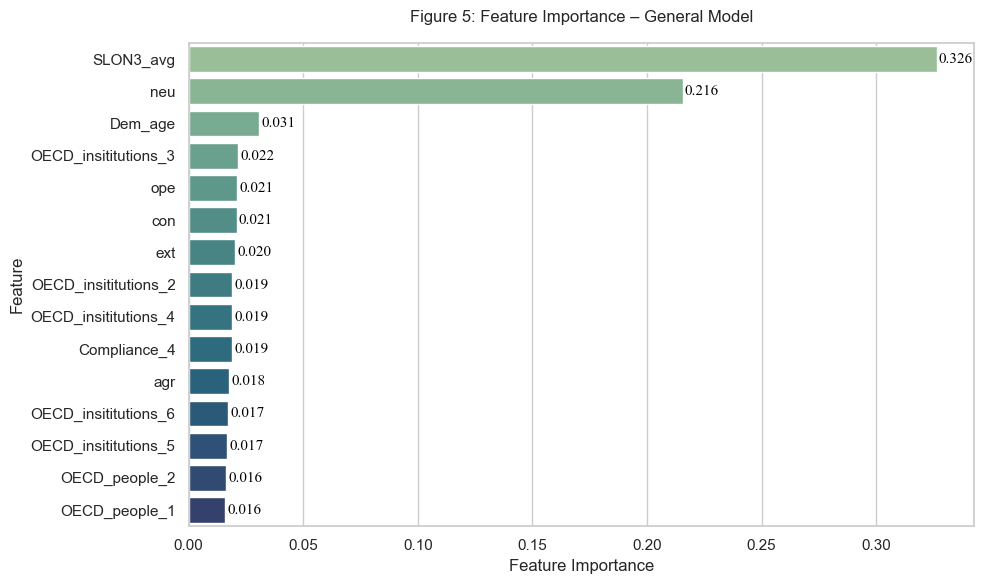

In [25]:
#Plotting the feature importance of the models

plot_feature_importance(rf_general, X_general, "Feature Importance – General Model")

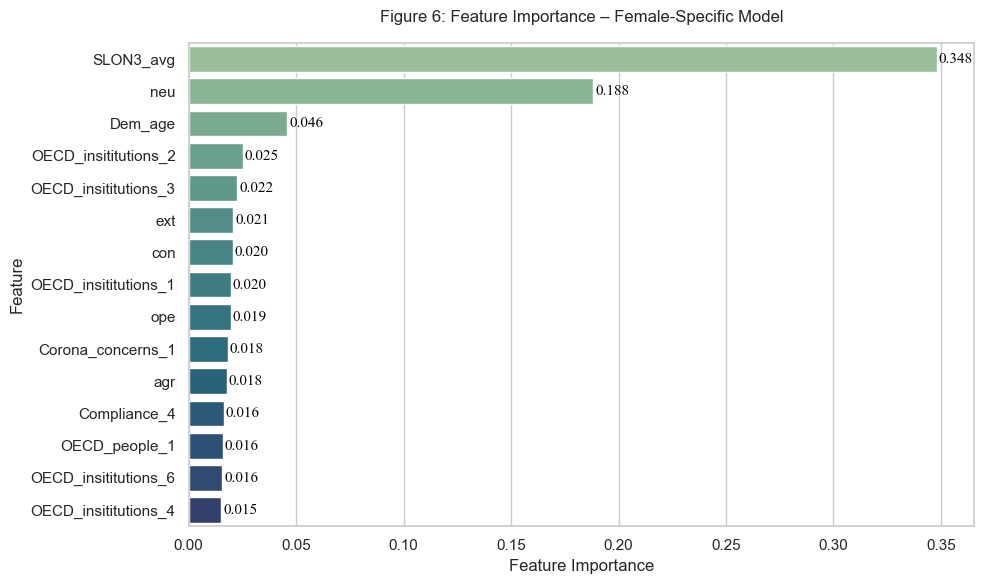

In [26]:
plot_feature_importance(rf_female, X_female, "Feature Importance – Female-Specific Model")

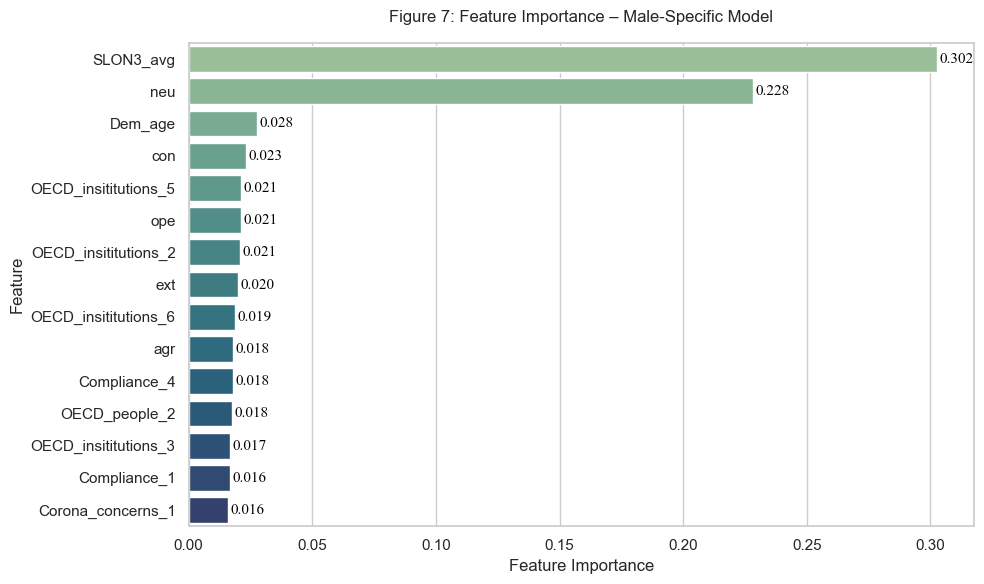

In [27]:
plot_feature_importance(rf_male, X_male, "Feature Importance – Male-Specific Model")

C:\Users\Danir\AppData\Local\Temp\ipykernel_25520\2849595694.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend().remove()
C:\Users\Danir\AppData\Local\Temp\ipykernel_25520\2849595694.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend().remove()
C:\Users\Danir\AppData\Local\Temp\ipykernel_25520\2849595694.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend().remove()


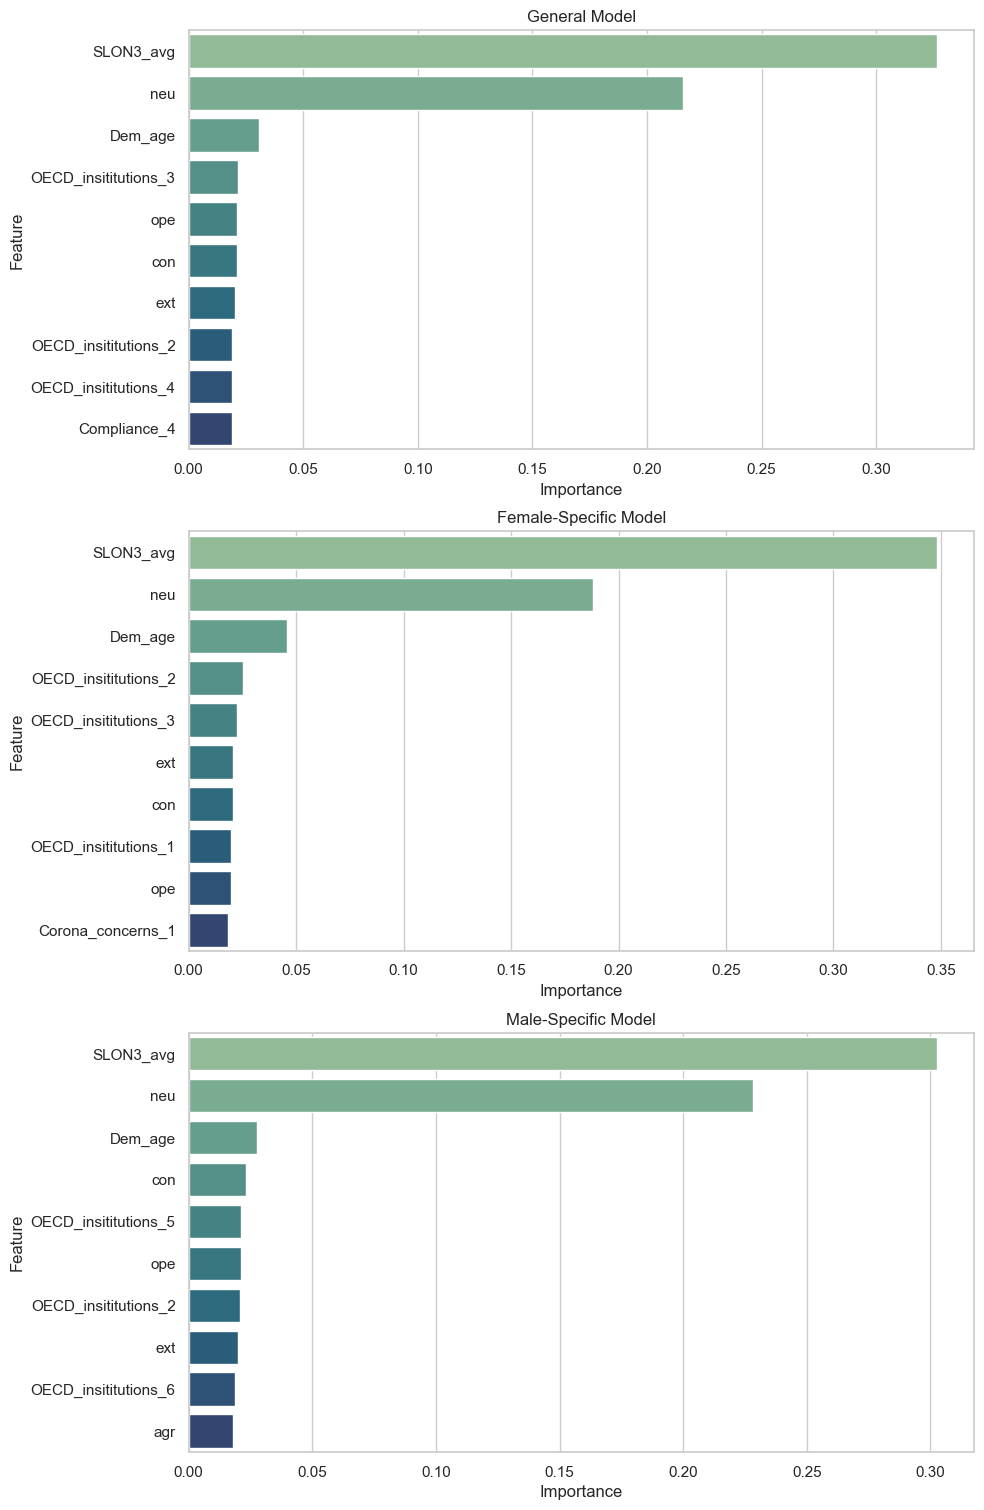

In [35]:
#Grouped plot for dissertation
def get_top_features(model, X, top_n=10):
    importances = model.feature_importances_
    features = pd.Series(importances, index=X.columns)
    return features.sort_values(ascending=False).head(top_n).reset_index().rename(columns={'index': 'Feature', 0: 'Importance'})

#Get top features from each model
general_features = get_top_features(rf_general, X_general)
female_features = get_top_features(rf_female, X_female)
male_features = get_top_features(rf_male, X_male)

#Setup shared plot (3 vertical subplots)
fig, axes = plt.subplots(3, 1, figsize=(10, 16), sharex=False)

#Style
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})
sns.set(style="whitegrid")

#Plot for General Model
sns.barplot(data=general_features, x='Importance', y='Feature', ax=axes[0], hue='Feature', palette='crest', dodge=False)
axes[0].set_title('General Model')
axes[0].set_xlabel('Importance')
axes[0].set_ylabel('Feature')
axes[0].legend().remove()

#Plot for Female Model
sns.barplot(data=female_features, x='Importance', y='Feature', ax=axes[1], hue='Feature', palette='crest', dodge=False)
axes[1].set_title('Female-Specific Model')
axes[1].set_xlabel('Importance')
axes[1].set_ylabel('Feature')
axes[1].legend().remove()

#Plot for Male Model
sns.barplot(data=male_features, x='Importance', y='Feature', ax=axes[2], hue='Feature', palette='crest', dodge=False)
axes[2].set_title('Male-Specific Model')
axes[2].set_xlabel('Importance')
axes[2].set_ylabel('Feature')
axes[2].legend().remove()

#Adjust layout and save!
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.savefig("feature_importance_grouped.png", dpi=300, bbox_inches='tight')
plt.show()


In [29]:
#Summary Statistics for each dataset, including the top 3 features for each model (which just so happen to all be the same!)

features = ['Dem_age', 'neu', 'SLON3_avg', 'PSS10_avg']

#Function to calculate stats
def get_summary_stats(df, dataset_name):
    stats = df[features].describe().loc[['mean', 'std', 'min', 'max']].T
    stats['Dataset'] = dataset_name
    stats.reset_index(inplace=True)
    stats.rename(columns={'index': 'Feature', 'mean': 'Mean', 'std': 'Std Dev', 'min': 'Min', 'max': 'Max'}, inplace=True)
    return stats

#Stats for each dataset
stats_general = get_summary_stats(df_general, 'General')
stats_female = get_summary_stats(df_female, 'Female')
stats_male = get_summary_stats(df_male, 'Male')

#Combine into one DataFrame
summary_table = pd.concat([stats_general, stats_female, stats_male], ignore_index=True)

pivot_table = summary_table.pivot(index=['Feature'], columns='Dataset', values=['Mean', 'Std Dev', 'Min', 'Max'])
pivot_table.columns = ['_'.join(col).strip() for col in pivot_table.columns.values]
pivot_table.reset_index(inplace=True)

print(pivot_table)

     Feature  Mean_Female  Mean_General  Mean_Male  Std Dev_Female  \
0    Dem_age    37.543473     37.566849  37.574560       13.374738   
1  PSS10_avg     2.694918      2.584536   2.481488        0.736438   
2  SLON3_avg     2.657478      2.540761   2.434851        1.000123   
3        neu     3.433151      3.295588   3.162012        1.055669   

   Std Dev_General  Std Dev_Male  Min_Female  Min_General  Min_Male  \
0        13.577711     13.956374        18.0         18.0      18.0   
1         0.729835      0.710131         1.0          1.0       1.0   
2         0.989222      0.972130         1.0          1.0       1.0   
3         1.051580      1.032710         1.0          1.0       1.0   

   Max_Female  Max_General  Max_Male  
0       110.0         89.0      98.0  
1         5.0          5.0       5.0  
2         5.0          5.0       5.0  
3         6.0          6.0       6.0  
